In [290]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk

# Зчитайте файл 2017_jun_final.csv
df = pd.read_csv('2017_jun_final.csv')

# Перевіримо перші кілька рядків
print(df.head())

   N                 Должность Язык.программирования Специализация  \
0  1        Junior QA engineer                   NaN     Manual QA   
1  2        Junior QA engineer                   NaN     Manual QA   
2  3         Software Engineer               C#/.NET           NaN   
3  4         Software Engineer            JavaScript           NaN   
4  5  Senior Software Engineer            JavaScript           NaN   

  Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0               0.5                          0.5               400   
1  меньше 3 месяцев             меньше 3 месяцев               430   
2                 4                            1              2500   
3                 5                            4              2000   
4    10 и более лет                          0.5              4500   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  ...  \
0                                 0  Харьков       до 10 человек  ...   
1           

In [291]:
# Визначте розмір таблиці за допомогою методу shape
print("Розмір таблиці:", df.shape)

Розмір таблиці: (8704, 25)


In [292]:
# Визначте типи всіх стовпців за допомогою dataframe.dtypes
print("Типи стовпців:")
print(df.dtypes)

Типи стовпців:
N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary           

In [293]:
# Порахуйте, яка частка пропусків міститься в кожній колонції
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Частка пропусків в кожній колонції:")
print(missing_percentage)

Частка пропусків в кожній колонції:
N                                    0.000000
Должность                            0.000000
Язык.программирования               44.232537
Специализация                       82.938879
Общий.опыт.работы                    0.000000
Опыт.работы.на.текущем.месте         0.000000
Зарплата.в.месяц                     0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
Город                                0.000000
Размер.компании                      0.000000
Тип.компании                         0.000000
Пол                                  0.000000
Возраст                              0.000000
Образование                          0.000000
Университет                          4.113051
Еще.студент                          0.000000
Уровень.английского                  0.000000
Предметная.область                   2.562040
Дата.заполнения                      0.000000
User.Agent                           0.000000
exp                                  0.00000

In [294]:
# Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
df = df.dropna(subset=['Язык.программирования'])

In [295]:
# Знову порахуйте, яка частка пропусків міститься в кожній колонції
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Частка пропусків в кожній колонції після видалення:")
print(missing_percentage)

Частка пропусків в кожній колонції після видалення:
N                                    0.000000
Должность                            0.000000
Язык.программирования                0.000000
Специализация                       99.979398
Общий.опыт.работы                    0.000000
Опыт.работы.на.текущем.месте         0.000000
Зарплата.в.месяц                     0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
Город                                0.000000
Размер.компании                      0.000000
Тип.компании                         0.000000
Пол                                  0.000000
Возраст                              0.000000
Образование                          0.000000
Университет                          4.758962
Еще.студент                          0.000000
Уровень.английского                  0.000000
Предметная.область                   0.618047
Дата.заполнения                      0.000000
User.Agent                           0.000000
exp                         

In [296]:
# Видаліть усі рядки з пропусками
df = df.dropna()

In [297]:
# Визначте новий розмір таблиці після видалення рядків з пропусками
print("Розмір таблиці після видалення:", df.shape)

Розмір таблиці після видалення: (0, 25)


In [298]:
# Створіть нову таблицю "python_data" з рядками, де мова програмування - Python
python_data = df[df['Язык.программирования'] == 'Python']

In [299]:
# Визначте розмір таблиці "python_data"
print("Розмір таблиці python_data:", python_data.shape)

Розмір таблиці python_data: (0, 25)


In [300]:
# Групування за стовпчиком "Посада"
grouped = df.groupby('Должность')

In [301]:
# Виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"
aggregated_data = grouped['Зарплата.в.месяц'].agg(['min', 'max'])
print(aggregated_data)

Empty DataFrame
Columns: [min, max]
Index: []


In [302]:
# Функція для обчислення середньої заробітної плати на місяць
def fill_avg_salary(salary_values):
    return salary_values.mean()

# Застосуйте функцію до стовпця "Зарплата.в.місяць" і створіть новий стовпчик "avg"
df['avg'] = df.groupby('Должность')['Зарплата.в.месяц'].transform(fill_avg_salary)
print(df)

Empty DataFrame
Columns: [N, Должность, Язык.программирования, Специализация, Общий.опыт.работы, Опыт.работы.на.текущем.месте, Зарплата.в.месяц, Изменение.зарплаты.за.12.месяцев, Город, Размер.компании, Тип.компании, Пол, Возраст, Образование, Университет, Еще.студент, Уровень.английского, Предметная.область, Дата.заполнения, User.Agent, exp, current_job_exp, salary, Валюта, cls, avg]
Index: []

[0 rows x 26 columns]


In [303]:
# Описова статистика для стовпця "avg"
print(df['avg'].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: avg, dtype: float64


In [304]:
# Збережіть таблицю в CSV файл
df.to_csv('output.csv', index=False)

C:\Users\prime\AppData\Local\pypoetry\Cache\virtualenvs\ds-ml-MjqMnQve-py3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\prime\AppData\Local\pypoetry\Cache\virtualenvs\ds-ml-MjqMnQve-py3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\prime\AppData\Local\pypoetry\Cache\virtualenvs\ds-ml-MjqMnQve-py3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


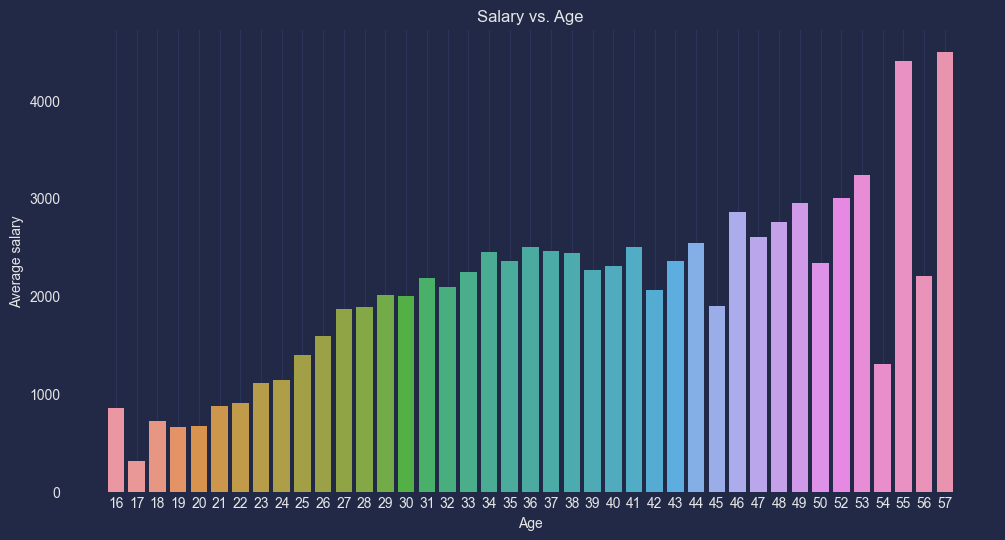

In [305]:
plt.style.use("cyberpunk")
df = pd.read_csv('2017_jun_final.csv')
# Створення графіка середньої заробітної плати за віком
mean_salary_by_age = df.groupby('Возраст')['Зарплата.в.месяц'].mean()
fig, ax = plt.subplots(figsize=(12, 6))
di = sns.barplot(x=mean_salary_by_age.index, y=mean_salary_by_age.values, ax=ax)
plt.title('Salary vs. Age')
plt.xlabel('Age')
plt.ylabel('Average salary')
plt.grid()

# Додавання світлових ефектів в стилі "cyberpunk"
mplcyberpunk.add_glow_effects()

plt.show()

C:\Users\prime\AppData\Local\pypoetry\Cache\virtualenvs\ds-ml-MjqMnQve-py3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\prime\AppData\Local\pypoetry\Cache\virtualenvs\ds-ml-MjqMnQve-py3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\prime\AppData\Local\pypoetry\Cache\virtualenvs\ds-ml-MjqMnQve-py3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\prime\AppData\Local\pypoetry\Cache\virtualenvs\ds-ml-MjqMnQve-py

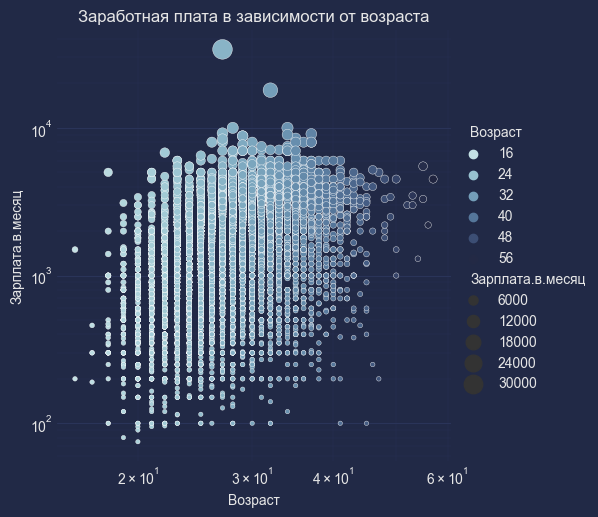

In [306]:
# Створіть палітру кольорів Cubehelix
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

# Створіть графік relplot на основі даних з DataFrame df
g = sns.relplot(
    data=df,
    x="Возраст", y="Зарплата.в.месяц",
    hue="Возраст", size="Зарплата.в.месяц",
    palette=cmap, sizes=(10, 200),
)

# Задайте логарифмічний масштаб для осей x та y
g.set(xscale="log", yscale="log")

# Додайте мінорну сітку для обох осей x та y
g.ax.xaxis.grid(True, "minor", linewidth=0.25)
g.ax.yaxis.grid(True, "minor", linewidth=0.25)

# Відключіть ліву та нижню осі
g.despine(left=True, bottom=True)

# Використайте mplcyberpunk.make_scatter_glow для додавання ефекту свічення
mplcyberpunk.make_scatter_glow(g.ax)

# Встановіть заголовок для графіку
plt.title('Заработная плата в зависимости от возраста')

plt.show()

C:\Users\prime\AppData\Local\pypoetry\Cache\virtualenvs\ds-ml-MjqMnQve-py3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\prime\AppData\Local\pypoetry\Cache\virtualenvs\ds-ml-MjqMnQve-py3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\prime\AppData\Local\pypoetry\Cache\virtualenvs\ds-ml-MjqMnQve-py3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\prime\AppData\Local\pypoetry\Cache\virtualenvs\ds-ml-MjqMnQve-py

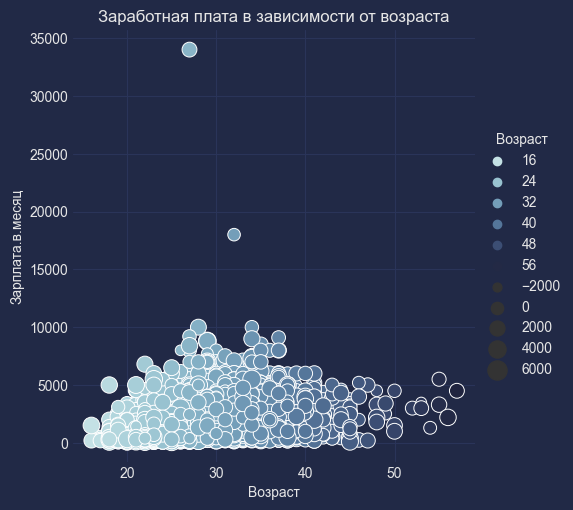

In [307]:
import numpy as np

plt.style.use("cyberpunk")

# Зчитайте ваш файл даних
df = pd.read_csv('2017_jun_final.csv')

# Створіть палітру кольорів Cubehelix
cmap = sns.cubehelix_palette(rot=-0.2, as_cmap=True)

# Генеруйте випадкові дані з гауссовим розподілом для розміру точок
mean_size = df["Зарплата.в.месяц"].mean()
std_size = df["Зарплата.в.месяц"].std()
sizes = np.random.normal(loc=mean_size, scale=std_size, size=len(df))

# Створіть графік relplot на основі даних з DataFrame df
g = sns.relplot(
    data=df,
    x="Возраст", y="Зарплата.в.месяц",
    hue="Возраст", size=sizes,  # Використовуйте гауссовий розподіл для розміру точок
    palette=cmap, sizes=(10, 200),
)

# Додайте мінорну сітку для обох осей x та y
g.ax.xaxis.grid(True, "minor", linewidth=0.25)
g.ax.yaxis.grid(True, "minor", linewidth=0.25)

# Відключіть ліву та нижню осі
g.despine(left=True, bottom=True)

# Використайте mplcyberpunk.make_scatter_glow для додавання ефекту свічення з вказаними кольорами
mplcyberpunk.make_scatter_glow(g.ax)

# Встановіть заголовок для графіку
plt.title('Заработная плата в зависимости от возраста')

plt.show()

C:\Users\prime\AppData\Local\pypoetry\Cache\virtualenvs\ds-ml-MjqMnQve-py3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\prime\AppData\Local\pypoetry\Cache\virtualenvs\ds-ml-MjqMnQve-py3.11\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


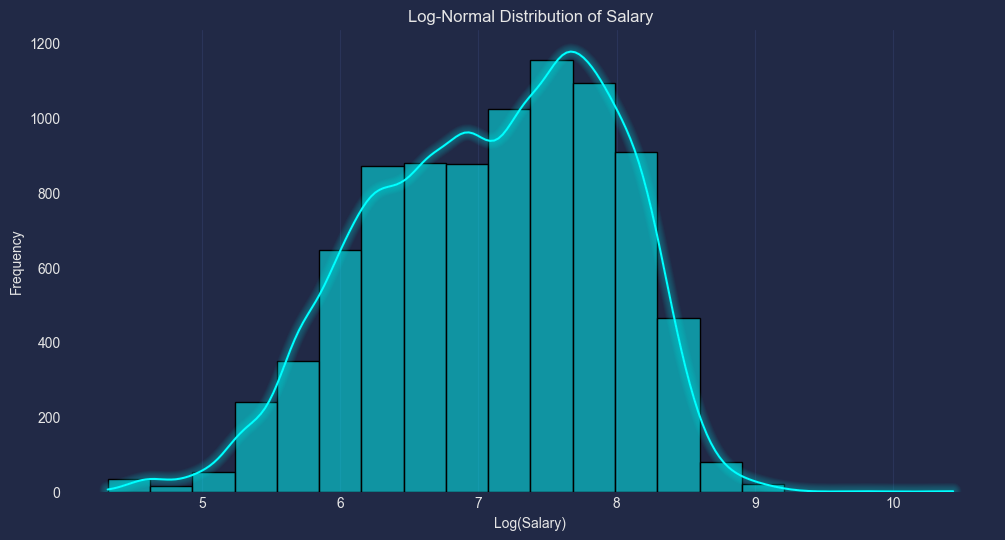

In [308]:
# Обчисліть логарифм зарплати, оскільки логнормальний розподіл базується на логарифмічних значеннях
df['log_salary'] = np.log(df['Зарплата.в.месяц'])

# Створення графіка з логнормальним розподілом
plt.figure(figsize=(12, 6))
sns.histplot(df, x='log_salary', bins=20, kde=True, color='cyan')
plt.title('Log-Normal Distribution of Salary')
plt.xlabel('Log(Salary)')
plt.ylabel('Frequency')
plt.grid(axis='y')

# Додавання світлових ефектів в стилі "cyberpunk"
mplcyberpunk.make_lines_glow()

plt.show()